AttributeError: module 'scipy' has no attribute 'optimize'

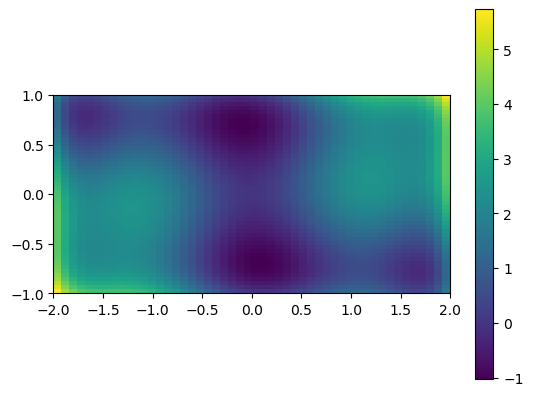

In [1]:
#2D minimization of a six-hump camelback function
import numpy as np
import scipy as sp
import pylab
import matplotlib.pyplot as plt

def f(x):
    return (4-2.1*x[0]**2+(x[0]**4)/3)*x[0]**2+x[0]*x[1]+(4*x[1]**2-4)*x[1]**2
x0=[1,1]
x=np.linspace(-2, 2)
y=np.linspace(-1,1)
xp,yp=np.meshgrid(x,y)
pylab.imshow(f([xp,yp]),extent=[-2,2,-1,1], origin='lower')
pylab.colorbar()
solution=sp.optimize.minimize(f,x0)
#solution=sp.optimize.basinhopping(f,x0)
print(solution)

In [ ]:
#Non-linear ODE: the damped pendulum
def derivative(O, time, Q, d, omega):
    return(O[1], -1/Q * O[0] + np.sin(O[1]) + d*np.cos(omega*time))
Oinit=[0,0]
Q=2
d=1.5
omega=0.65
t=np.linspace(0,240,200)
#O=sp.integrate.odeint(derivative, Oinit, t, args=(Q, d, omega))
O=sp.integrate.odeint(derivative, Oinit, t, args=(Q, d, omega))
plt.figure(figsize=(20, 7))
plt.plot(t, O[:, 0], label="$theta$")
plt.plot(t, O[:, 1], label="$omega$",color='orange')
plt.xlabel('t')
plt.ylabel('A')
plt.legend(loc='best')
plt.grid()

In [ ]:
#FFT of a simple dataset
data=np.loadtxt('data/populations.txt')
data_c=data[:,1:4]
years=data[:,0]
hares=data[:,1]
lynx=data[:,2]
carrots=data[:,3]
#perform fft
hares_fft=sp.fftpack.fft(hares)
lynx_fft=sp.fftpack.fft(lynx)

#get the power spectral density
hares_psd=np.abs(hares_fft)**2
lynx_psd=np.abs(lynx_fft)**2

fftfreq=sp.fftpack.fftfreq(len(lynx_psd), 1/21)
spect=fftfreq>=0

#plot the hares fft
plt.figure(figsize=(8, 6))
plt.plot(fftfreq[spect], hares_psd[spect])
plt.xlabel('Frequency(1/2 years)')
plt.ylabel('Hares_psd')
plt.yscale('log')
plt.grid()

#plot the lynx fft
plt.figure(figsize=(8, 6))
plt.plot(fftfreq[spect], lynx_psd[spect])
plt.xlabel('Frequency(1/2 years)')
plt.ylabel('Lynx_psd')
plt.yscale('log')
plt.grid()

In [ ]:
#FFT of an image
im = plt.imread('images/moonlanding.png').astype(float)

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')
im_fft = sp.fftpack.fft2(im)

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = sp.fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')